In [1]:
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.style.use("ggplot")

In [2]:
# load the dataset and display the first five rows
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# check if there any inconsistency exists in the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
#drop the column that's not required
iris.drop("Id", axis=1, inplace=True)

# Let's get started with some exploratory data analysis 

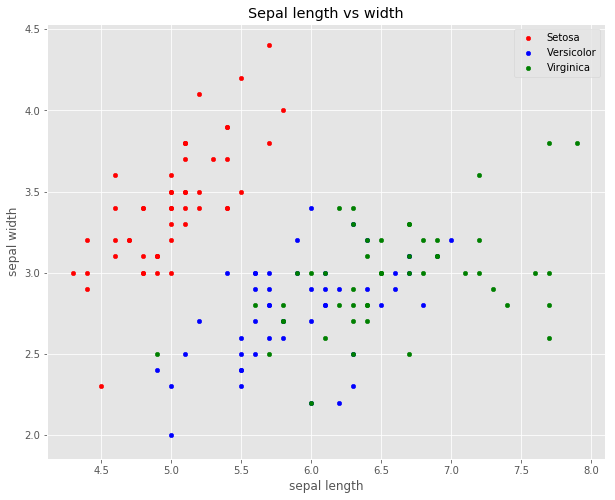

In [5]:
fig = iris[iris.Species == "Iris-setosa"].plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", color="red", label="Setosa")
fig = iris[iris.Species == "Iris-versicolor"].plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", color="blue", label="Versicolor", ax=fig)
fig = iris[iris.Species == "Iris-virginica"].plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", color="green", label="Virginica", ax=fig)

fig.set_xlabel("sepal length")
fig.set_ylabel("sepal width")
fig.set_title("Sepal length vs width")
fig = plt.gcf()
fig.set_size_inches(10,8)

plt.show()

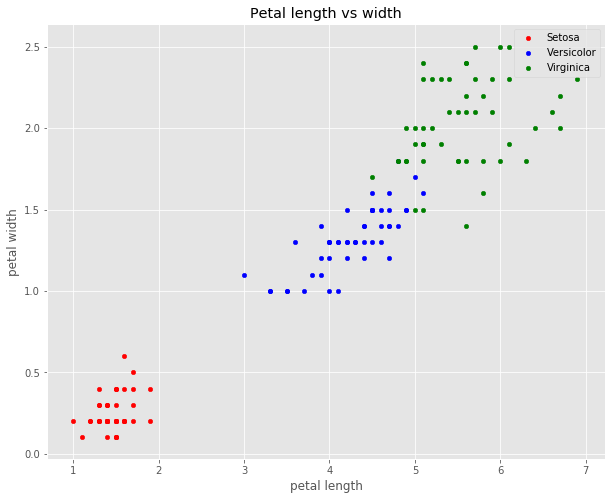

In [6]:
fig = iris[iris.Species == "Iris-setosa"].plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm", color="red", label="Setosa")
fig = iris[iris.Species == "Iris-versicolor"].plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm", color="blue", label="Versicolor", ax=fig)
fig = iris[iris.Species == "Iris-virginica"].plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm", color="green", label="Virginica", ax=fig)

fig.set_xlabel("petal length")
fig.set_ylabel("petal width")
fig.set_title("Petal length vs width")
fig=plt.gcf()
fig.set_size_inches(10,8)

plt.show()

### Let's now see how the length and width of petals and sepals are distributed

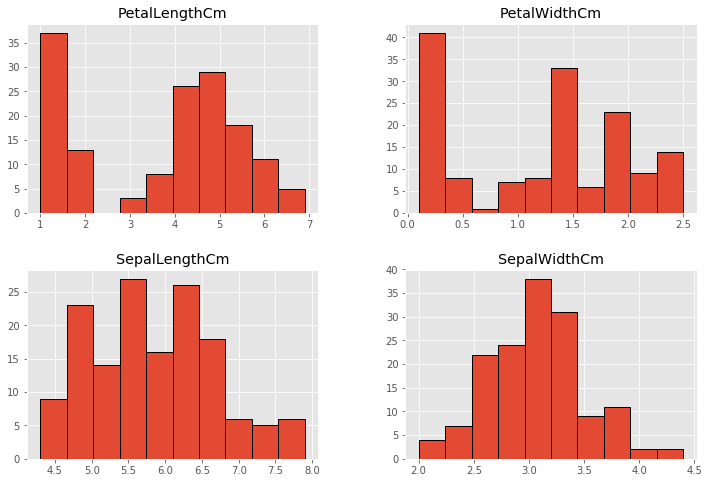

In [7]:
iris.hist(edgecolor="black", linewidth=1.0)
fig=plt.gcf()
fig.set_size_inches(12,8)

plt.show()

### Let's now see how the length and width vary according to species

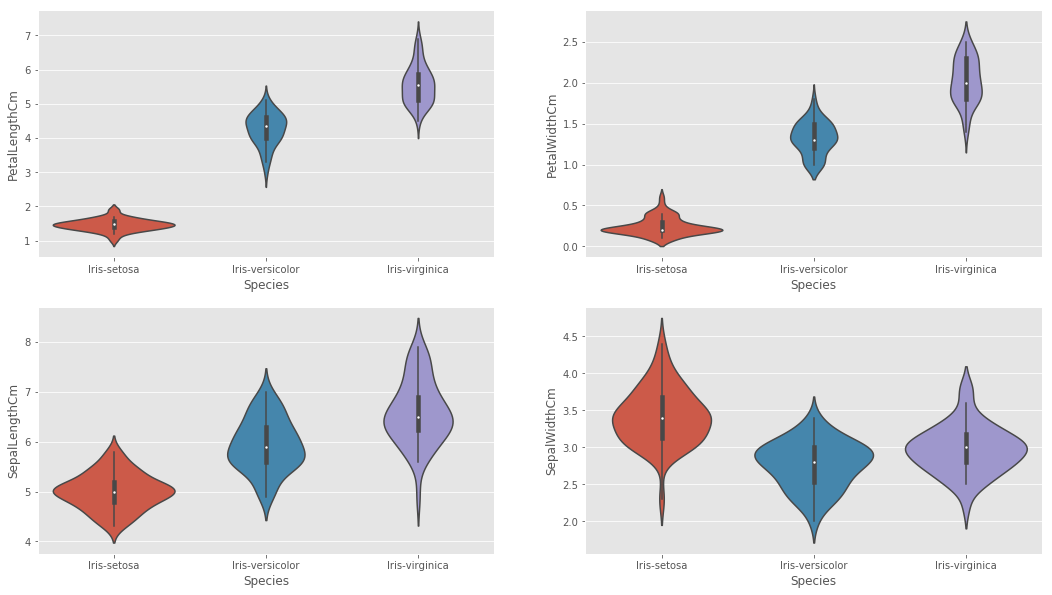

In [8]:
# violin plot shows the density of length and width of the species
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.violinplot(x="Species", y="PetalLengthCm", data=iris)

plt.subplot(2,2,2)
sns.violinplot(x="Species", y="PetalWidthCm", data=iris)

plt.subplot(2,2,3)
sns.violinplot(x="Species", y="SepalLengthCm", data=iris)

plt.subplot(2,2,4)
sns.violinplot(x="Species", y="SepalWidthCm", data=iris)

plt.show()

### Let's build a model using classification algorithms

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [10]:
# get the shape of the dataset i.e., rows,columns
iris.shape

(150, 5)

### Check the correlation between the features

Features and their coorelation play an important role. If many of the features are highly correlated, then the accuracy will be reduced when we train an algorithm with all the features. Therefore, selection of features should be done with care.

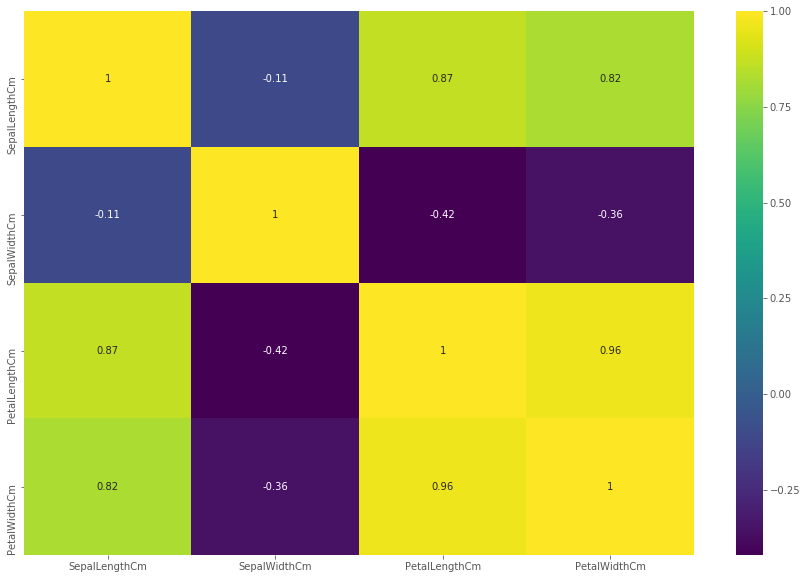

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(iris.corr(), annot=True, cmap="viridis")

plt.show()

#### From the above figure, we can note that sepal length and width are not correlated whereas petal length and width are highly correlated.

In [12]:
# split the data into training and test data
train, test = train_test_split(iris, test_size=0.3) # test_size=0.3 splits the data into train = 70% and test = 30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [13]:
# take the training data features
train_X = train[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
train_y = train.Species # output of the training data

test_X = test[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]] # take the test data features
test_y = test.Species # output of the test data

In [14]:
# check the train dataset
train_X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
89,5.5,2.5,4.0,1.3
110,6.5,3.2,5.1,2.0
97,6.2,2.9,4.3,1.3


In [15]:
# check the test dataset
test_X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
84,5.4,3.0,4.5,1.5
40,5.0,3.5,1.3,0.3
1,4.9,3.0,1.4,0.2


In [16]:
# output of the training data
train_y.head()

89     Iris-versicolor
110     Iris-virginica
97     Iris-versicolor
118     Iris-virginica
67     Iris-versicolor
Name: Species, dtype: object

### Let's begin to check the accuracy using different models

#### 1. Logistic Regression

In [17]:
model = LogisticRegression() # selection of algorithm
model.fit(train_X, train_y) # train the algorithm with training data and training output
prediction = model.predict(test_X) # pass the data to be tested to the trained algorithm

print("Accuracy of logistic regression is", metrics.accuracy_score(prediction, test_y)) # check the accuracy of the algorithm
# here we pass the predicted output by the model and the actual output

Accuracy of logistic regression is 0.9777777777777777


#### 2. Decision Tree

In [18]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print("Accuracy of decision tree is", metrics.accuracy_score(prediction, test_y))

Accuracy of decision tree is 0.9555555555555556


#### 3. K-Nearest Neighbors

In [19]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print("Accuracy of KNN is", metrics.accuracy_score(prediction, test_y))

Accuracy of KNN is 0.9555555555555556


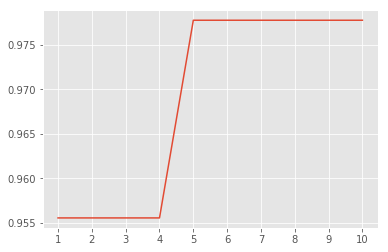

In [20]:
#now let's check for different values of n
range = list(range(1,11))
s = []
x = [1,2,3,4,5,6,7,8,9,10]

for i in range:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    s.append(metrics.accuracy_score(prediction, test_y))
    
plt.plot(range, s)
plt.xticks(x)
plt.show()

#### 4. Support Vector Machine (SVM)

In [21]:
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print("Accuracy of svm is", metrics.accuracy_score(prediction, test_y))

Accuracy of svm is 0.9777777777777777


#### By observing the above models, the accuracy of SVM is fairly good compared to other models.

#### In the above models, we used all the features of iris. Now, we'll consider petals and sepals separately.

In [22]:
# create a training data for petals and sepals
petals = iris[["PetalLengthCm", "PetalWidthCm", "Species"]]
sepals = iris[["SepalLengthCm", "SepalWidthCm", "Species"]]

In [23]:
train_p,test_p = train_test_split(petals, test_size=0.3, random_state=0)  # represent petals
train_x_p=train_p[["PetalWidthCm","PetalLengthCm"]]
train_y_p=train_p.Species
test_x_p=test_p[["PetalWidthCm","PetalLengthCm"]]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepals, test_size=0.3, random_state=0)  # represent sepals
train_x_s=train_s[["SepalWidthCm","SepalLengthCm"]]
train_y_s=train_s.Species
test_x_s=test_s[["SepalWidthCm","SepalLengthCm"]]
test_y_s=test_s.Species

#### 1. Logistic Regression

In [24]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print("Accuracy of logistic regression based on petals is",metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print("Accuracy of logistic regression based on sepals is",metrics.accuracy_score(prediction,test_y_s))

Accuracy of logistic regression based on petals is 0.6888888888888889
Accuracy of logistic regression based on sepals is 0.6444444444444445


#### 2. Decision Tree

In [25]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print("Accuracy of decision tree based on petals is",metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print("Accuracy of decision tree based on sepals is",metrics.accuracy_score(prediction,test_y_s))

Accuracy of decision tree based on petals is 0.9555555555555556
Accuracy of decision tree based on sepals is 0.6444444444444445


#### 3. K-Nearest Neighbors

In [26]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print("Accuracy of KNN based on petals is",metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print("Accuracy of KNN based on sepals is",metrics.accuracy_score(prediction,test_y_s))

Accuracy of KNN based on petals is 0.9777777777777777
Accuracy of KNN based on sepals is 0.7333333333333333


#### 4. Support Vector Machine (SVM)

In [27]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print("Accuracy of SVM based on petals is",metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print("Accuracy of SVM based on sepals is",metrics.accuracy_score(prediction,test_y_s))

Accuracy of SVM based on petals is 0.9777777777777777
Accuracy of SVM based on sepals is 0.8


#### Hence, we can conclude that petals give much better accuracy over sepals when used for training the data. And the same is shown in the heatmap above.